In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:/PROJECT WITH SUJAL/Titanic - Machine Learning from Disaster/Titanic_ML_Disaster/train.csv")
test_df = pd.read_csv("D:/PROJECT WITH SUJAL/Titanic - Machine Learning from Disaster/Titanic_ML_Disaster/test.csv")

In [3]:
#sns.heatmap(df.corr(), cmap = "RdYlGn")
#plt.show()

In [4]:
split = StratifiedShuffleSplit(n_splits= 1, test_size= 0.2)
for train_indice, test_indice in split.split(df, df[["Survived", "Pclass", "Sex"]]):
    strat_train_set = df.loc[train_indice]
    strat_test_set = df.loc[test_indice]

<Axes: >

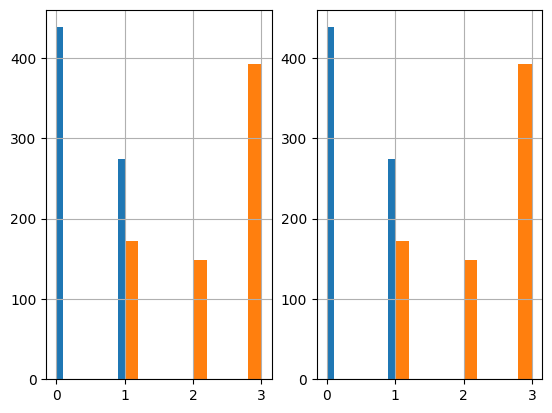

In [5]:
plt.subplot(1, 2, 1)
strat_train_set["Survived"].hist()
strat_train_set["Pclass"].hist()

plt.subplot(1, 2, 2)
strat_train_set["Survived"].hist()
strat_train_set["Pclass"].hist()

In [6]:
class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y =None):
        return self
    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X["Age"] = imputer.fit_transform(X[["Age"]])
        return X

In [7]:
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y =None):
        return self
    def transform(self, X):
        encoder = OneHotEncoder()
        matrix =encoder.fit_transform(X[["Embarked"]]).toarray()
        column_names =  ["C", "S", "Q", "N"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        matrix =encoder.fit_transform(X[["Sex"]]).toarray()    
        
        column_names =  ["Female", "Male"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        
        return X
    

In [8]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y =None):
        return self
    def transform(self, X):
        return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N" ], axis = 1, errors = "ignore")

In [9]:
pipeline = Pipeline([("ageimputer", AgeImputer()),
                     ("featureencoder", FeatureEncoder()),
                     ("featuredropper", FeatureDropper())])

In [10]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [11]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
786,787,1,3,18.000000,0,0,7.4958,0.0,0.0,1.0,1.0,0.0
5,6,0,3,30.250891,0,0,8.4583,0.0,1.0,0.0,0.0,1.0
825,826,0,3,30.250891,0,0,6.9500,0.0,1.0,0.0,0.0,1.0
148,149,0,2,36.500000,0,2,26.0000,0.0,0.0,1.0,0.0,1.0
792,793,0,3,30.250891,8,2,69.5500,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
819,820,0,3,10.000000,3,2,27.9000,0.0,0.0,1.0,0.0,1.0
241,242,1,3,30.250891,1,0,15.5000,0.0,1.0,0.0,1.0,0.0
596,597,1,2,30.250891,0,0,33.0000,0.0,0.0,1.0,1.0,0.0
745,746,0,1,70.000000,1,1,71.0000,0.0,0.0,1.0,0.0,1.0


In [12]:
X = strat_train_set.drop(['Survived'], axis = 1)
Y = strat_train_set['Survived']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = Y.to_numpy()

In [13]:
clf = RandomForestClassifier()
param_grid = [
    {"n_estimators" : [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2, 3, 4]}
]

grid_search = GridSearchCV(clf, param_grid, cv = 3, scoring=  "accuracy", return_train_score= True)
grid_search.fit(X_data, y_data)

In [ ]:
final_clf = grid_search.best_estimator_

In [ ]:
final_clf

RandomForestClassifier(n_estimators=200)

In [ ]:
strat_test_set = pipeline.fit_transform(strat_test_set)
strat_test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
844,845,0,3,17.000000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
267,268,1,3,25.000000,1,0,7.7750,0.0,0.0,1.0,0.0,1.0
674,675,0,2,30.772059,0,0,0.0000,0.0,0.0,1.0,0.0,1.0
230,231,1,1,35.000000,1,0,83.4750,0.0,0.0,1.0,1.0,0.0
656,657,0,3,30.772059,0,0,7.8958,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
459,460,0,3,30.772059,0,0,7.7500,0.0,1.0,0.0,0.0,1.0
283,284,1,3,19.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
847,848,0,3,35.000000,0,0,7.8958,1.0,0.0,0.0,0.0,1.0
643,644,1,3,30.772059,0,0,56.4958,0.0,0.0,1.0,0.0,1.0


In [ ]:
X_test = strat_test_set.drop(["Survived"], axis = 1)
Y_test = strat_test_set["Survived"]

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = Y_test.to_numpy()

In [ ]:
final_clf.score(X_data_test, y_data_test)

0.8212290502793296

In [ ]:
final_data = pipeline.fit_transform(df)

In [ ]:
X_final = final_data.drop(["Survived"], axis  = 1)
Y_final = final_data["Survived"]

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_final = Y_final.to_numpy()

In [ ]:
prod_clf = RandomForestClassifier()
param_grid = [
    {"n_estimators" : [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2, 3, 4]}
]

grid_search = GridSearchCV(prod_clf, param_grid, cv = 3, scoring=  "accuracy", return_train_score= True)
grid_search.fit(X_data_final, y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
prod_final_clf = grid_search.best_estimator_
prod_final_clf

RandomForestClassifier(max_depth=10, n_estimators=200)

In [ ]:
test_df = pd.read_csv("test.csv")
final_test_data = pipeline.fit_transform(test_df)
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.1 KB


In [ ]:
X_final_test = final_test_data
X_final_test = X_final_test.fillna(method = "ffill")

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

C:\Users\NOVA BURST\AppData\Local\Temp\ipykernel_16980\485946229.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_final_test = X_final_test.fillna(method = "ffill")


In [ ]:
predictions = prod_final_clf.predict(X_data_final_test)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
final_df = pd.DataFrame(test_df["PassengerId"])
final_df["Survived"] = predictions
final_df.to_csv("gender_submission.csv", index = False)

In [ ]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
